In [1]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as patches

In [9]:
class MaxEntClass(object):
    def __init__(self):
        self.W = None
        self.b = 0
    
    # softmax function to return the probabilities 
    def softmax(self,input):
        return np.exp(input) / np.exp(input).sum(axis=1, keepdims=True)
    
    # function to get one hot encoding of the class labels
    def get_one_hot_encoding(self,labels):
        values = np.zeros((300, 3))
        values[np.arange(300), labels] = 1
        return values
    
    # cost function to return the cost
    def cost(self, Y, predicted, W):
        first = - np.mean(np.sum(Y*np.log(predicted)))
        last = (0.6/2) * np.sum(W * W)
        return  first + last
    
    # function to convert predictions into one hot encodings of target labels
    def one_hot_predict(self, Y, predictions):
        targets = np.argmax(predictions, axis = 1)
        values = np.zeros((300, 3))
        values[np.arange(300), targets] = 1
        return values
    
    def predict(self, data):
        Z = np.dot(data,self.W) + self.b
        return self.softmax(Z)
    
    def scatter_plot(self, feature1, feature2, classes):
        plt.clf()
        plt.scatter(feature1, feature2, c=classes, cmap=colors.ListedColormap(['GREEN', 'BLUE', 'YELLOW']))
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title("Scatter Plot for the targets for the dataset")
        yellow_patch = patches.Patch(color='yellow', label='Class 0')
        green_patch = patches.Patch(color='green', label='Class 1')
        blue_patch = patches.Patch(color='blue', label='Class 2')

        plt.legend(handles=[yellow_patch, green_patch, blue_patch])
        plt.show()

        
        
        
        
    # training 
    def train(self,X,Y, epochs):
        
        samples, params = X.shape
        
        # initialize weights and biases
        self.W = np.random.randn(params,3)
        self.b = np.zeros(3)
        
        # converting class labels to one hot encoded class labels
        classes = self.get_one_hot_encoding(Y)
            
        cost = []
        
        # for each epoch
        for i in range(epochs):
            
            # calculate input matrix
            inputM = np.dot(X,self.W) + self.b

            # predictions using softmax
            predict = self.softmax(inputM)
            
            
            # updating weights
            W_gradient = np.dot(X.T,((1/samples)*(predict - classes))) + 0.6*self.W
            self.W = self.W - 0.005 * W_gradient 
            
            # updating biases
            b_gradient = (1/samples) * sum(predict - classes)
            self.b = self.b - 0.005 * b_gradient
        
                        
            # training costs
            cost.append(self.cost(classes, predict, self.W))
            
            # getting the final predictions
            predicted = self.one_hot_predict(classes, predict)
            
        print("Accuracy: ", np.mean(classes != predicted)*100, "%") 


        return predicted
        
        #self.scatter_plot(X[:,0], X[:,1], Y)      
        #print(cost)
        
        

Accuracy:  58.666666666666664 %


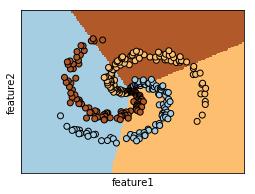

In [22]:
Y = []
X = []
labels = []

for line in open('spiral_train.dat'):
    row = [float(x) for x in line.split(',')]
    X.append(row)
    
X = np.array(X)
Y = X[:,2]
X = np.delete(X,2,1)
for i in range(len(Y)):
    labels.append(int(Y[i]))

labels = np.array(labels)
maxEnt = MaxEntClass()
pred = maxEnt.train(X,labels,120)


x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
com = np.c_[xx.ravel(), yy.ravel()]
        
Z = maxEnt.predict(com)
Z = np.argmax(Z, axis = 1)



#Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('feature1')
plt.ylabel('feature2')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()




